In [24]:
import sys
sys.path.append('../')

import numpy as np
#from scipy import ndimage

from utils.utils import *
from scipy import ndimage, fft

import os
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from scipy import ndimage, fft


(1, 3, 3, 1) (1, 3, 3, 1) (1, 3, 3, 1)


<tf.Tensor: shape=(3, 3, 1, 1), dtype=float64, numpy=
array([[[[0.06358119]],

        [[0.06358119]],

        [[0.06358119]]],


       [[[0.06358119]],

        [[0.06358119]],

        [[0.06358119]]],


       [[[0.06358119]],

        [[0.06358119]],

        [[0.06358119]]]])>

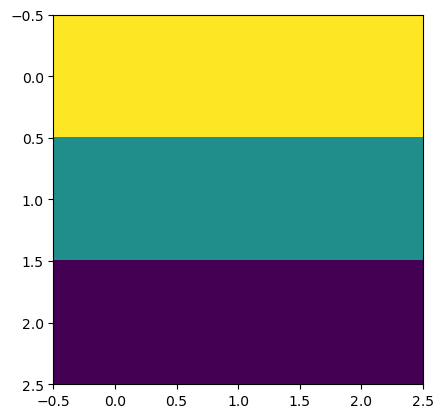

In [36]:
filters = np.zeros((3,3,1,1))

t = np.zeros((3,3))
t[1, 0] = np.sqrt(0.75)
t[0, 0] = np.sqrt(0.25)
filters = np.reshape(fft.idctn(t, norm='ortho'), (3,3,1,1)) 
filters /= np.sum(np.abs(filters))
plt.imshow(filters[...,0,0])
sf, af =  getSymAntiSymTF(filters)
sf


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 10, 10, 3) (1, 10, 10, 3) (1, 10, 10, 3)


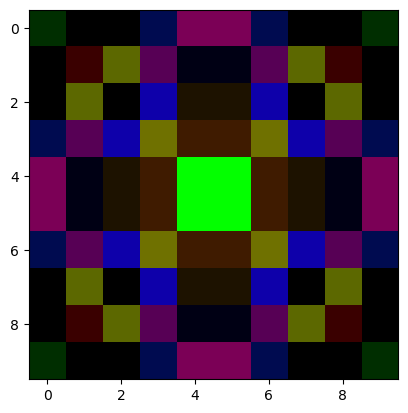

In [28]:
img = tf.random.normal((10,10,3,1))
simg, aimg = getSymAntiSymTF(img)
plt.imshow(simg[...,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


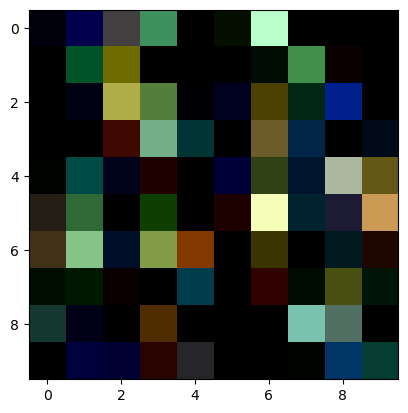

In [51]:
x = tf.nn.relu( tf.nn.conv2d(img, filters , strides=(1,1), 
							padding='SAME') )
plt.imshow(x[...,0])

In [39]:
sf.shape


TensorShape([3, 3, 1, 1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


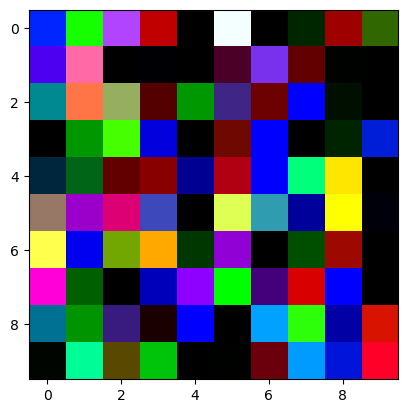

In [64]:
plt.imshow(aimg[...,0]*0.75)

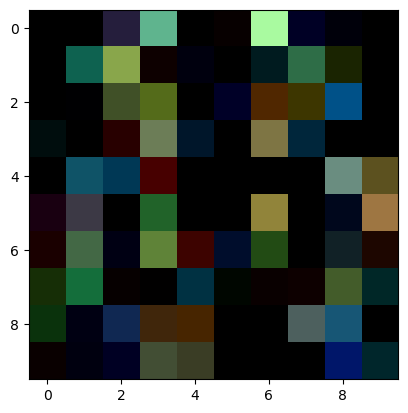

In [60]:
x = tf.nn.relu(tf.nn.conv2d(aimg, af.numpy() , strides=(1,1), 
							padding='SAME') )
plt.imshow(x[...,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


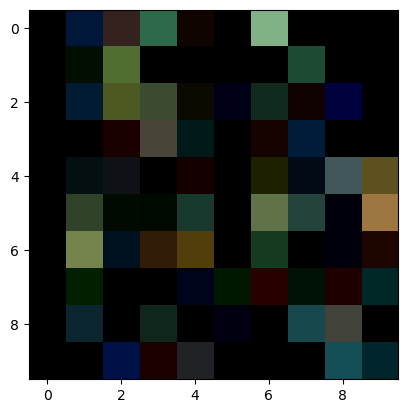

In [ ]:
x = tf.nn.conv2d(aimg, af , strides=(1,1), 
							padding='SAME') 
plt.imshow(x[...,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


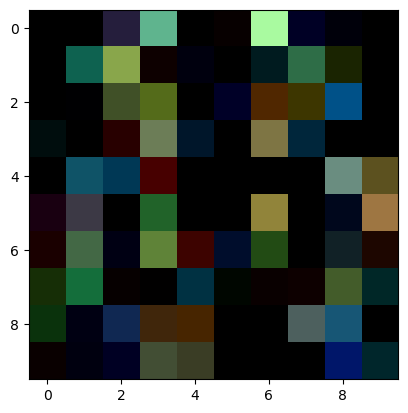

In [57]:
x = tf.nn.conv2d(aimg, af.numpy() , strides=(1,1), 
							padding='SAME') 
plt.imshow(x[...,0])